# Session 3-1: Data Science for Sustainability (Finally!) 🛰️🌍

![ntl](./assets/ntl.jpg)

Data science for sustainability is a ***broad*** topic. But generally, to figure out how we might create a more sustainabile future, we need two types of data: human and environment. These types of data are inharently geospatial because they **map** human and environment phenomena on planet earth. 

[<span class="codeb">Geographic Information Systems</span>](https://en.wikipedia.org/wiki/Geographic_information_system) (GIS) allow for visualizing, manipulating, and analyzing human and environmental geographic data. But GIS platforms have limited utility because (1) it can be difficult to reproduce work flows with a GIS and (2) processing large volumes of data inefficent with a GIS graphical user interface (GUI). Further, GIS platforms tend to be a black box that do not allow you to fully understand how your data is being processed. 

Thankfully, open-source data science evangelists have developed a suite of geospatial data science packages – such as [<span class="codeb">GeoPandas</span>](https://geopandas.org) and [<span class="codeb">Rasterio</span>](https://rasterio.readthedocs.io) – in Python that build upon [Numpy](https://numpy.org), [<span class="codeb">Pandas</span>](https://pandas.pydata.org), and other commonly used Python packages. As such, many of the data structures and functions are similar for packages like <span class="code">Geopandas</span> as they are in Pandas. 

In this session, we will overview how GeoSpatial data can be analysized in Python. Those of you who have a background in GIS will notice many parallels with ArcGIS and QGIS. The advantage here, is you will have budding cababilities to build your own GIS, but with Python. 
 
<p style="height:1pt"> </p>

<div class="boxhead2">
    Session Topics
</div>

<div class="boxtext2">
<ul class="a">
    <li> 📌 Introduction to <span class="codeb">GeoPandas</span> </li>
    <ul class="b">
        <li> Anatomy of a Geometry </li>
        <li> Importing Shape Files </li>
        <li> Concatenating and Merging Data </li>
        <li> Coordinate reference systems and projections </li>
    </ul>
    <li> 📌 Introduction to <span class="codeb">Rasterio</span> </li>
    <ul class="b">
        <li> Reading raster files </li>
        <li> Raster meta data </li>
        <li> Rasters as 2-d arrays </li>   
        <li> Rasters math </li>   
</ul>
</div>

<hr style="border-top: 0.2px solid gray; margin-top: 12pt; margin-bottom: 0pt"></hr>

### Instructions
We will work through this notebook together. To run a cell, click on the cell and press "Shift" + "Enter" or click the "Run" button in the toolbar at the top. 

<p style="color:#408000; font-weight: bold"> 🐍 &nbsp; &nbsp; This symbol designates an important note about Python structure, syntax, or another quirk.  </p>

<p style="color:#008C96; font-weight: bold"> ▶️ &nbsp; &nbsp; This symbol designates a cell with code to be run.  </p>

<p style="color:#008C96; font-weight: bold"> ✏️ &nbsp; &nbsp; This symbol designates a partially coded cell with an example.  </p>

<hr style="border-top: 1px solid gray; margin-top: 24px; margin-bottom: 1px"></hr>

## Introduction to GeoPandas

<img src="./assets/geopandas.png">

GeoPandas is an open-source Python library that ascribes geographic information to Pandas Series and Pandas DataFrame objects. In other words, GeoPandas enables a Pandas Series/DataFrame to have a spatial dimension, akin to a .shp file in a GIS platform. Importantly, Geopandas can perform geometric operations. To do this, GeoPandas objects use **[Shapely](https://pypi.org/project/shapely/)** geometry objects. 

### GeoSpatial Data 
<hr style="border-top: 0.2px solid gray; margin-top: 12px; margin-bottom: 1px"></hr>

GeoSpatial data is either `raster` (e.g. a grid) or `vector` (e.g. 2-d cartesian points, lines, or polygons). We will come back to raster data later in this lession. 

<img src="./assets/raster-vector.png" alt="rastervector" width="500"/>

Because GeoPandas ascribes spatial information to tabular data, GeoPandas objects are `vector` spatial data. Each row in a GeoPandas DataFrame, must have spatial information that is either a point, line, or polygon that corresponds to the geographic location(s), or area, to which the data should be mapped.  

To add spatial information to a Pandas DataFrame, the `geometry` column implements a `shapely` object that contains infromation about the cartesian location of the location of that data. Let's look at an example. 

<div class="run">
    ▶️ <b> Run the cell below. </b>
</div>

In [1]:
import pandas as pd 
# Create a Pandas DataFrame from a list
df = pd.DataFrame({'location' : ['p1','p2','p3','p4','p5','p6','p7'],
                   'data1' : [1,2,3,4,5,6,7],
                   'data2' : [10,22,55,67,70,1,87]})
df

,location,data1,data2
0,p1,1,10
1,p2,2,22
2,p3,3,55
3,p4,4,67
4,p5,5,70
5,p6,6,1
6,p7,7,87


The DataFrame has three columns - location, data1, and data2 - but it does not have any geographic information from which it can be mapped. To do this, we need to first great x and y coordinates (usually latitude and longitude).

<div class="run">
    ▶️ <b> Run the cell below. </b>
</div>

In [2]:
df['x'] = [0,2,3,4,20,4,10]
df['y'] = [1,0,5,2,6,4,11]
df

,location,data1,data2,x,y
0,p1,1,10,0,1
1,p2,2,22,2,0
2,p3,3,55,3,5
3,p4,4,67,4,2
4,p5,5,70,20,6
5,p6,6,1,4,4
6,p7,7,87,10,11


Now we will turn our `x` and `y` columns into a `Shapely POINT` and implement a `GeoPandas DataFrame`

<div class="run">
    ▶️ <b> Run the cell below. </b>
</div>

In [3]:
from shapely.geometry import Point
import geopandas as gpd

df['geometry'] = [Point(xy) for xy in zip(df.x, df.y)] 
gdf = gpd.GeoDataFrame(df)
gdf

,location,data1,data2,x,y,geometry
0,p1,1,10,0,1,POINT (0.00000 1.00000)
1,p2,2,22,2,0,POINT (2.00000 0.00000)
2,p3,3,55,3,5,POINT (3.00000 5.00000)
3,p4,4,67,4,2,POINT (4.00000 2.00000)
4,p5,5,70,20,6,POINT (20.00000 6.00000)
5,p6,6,1,4,4,POINT (4.00000 4.00000)
6,p7,7,87,10,11,POINT (10.00000 11.00000)


In [4]:
# check the type of object for the first geometry
type(gdf['geometry'][0])

shapely.geometry.point.Point

#### Now, let's map our data!
Notice that the points are plotted on the x and y coordinates we provided, but the color of the points corresponds to data2 feild. If you change the column to data2, then the colors will change to represent data2. 

<div class="run">
    ▶️ <b> Run the cell below. </b>
</div>

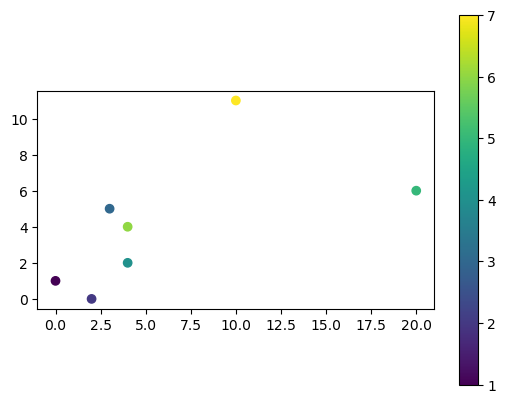

In [5]:
ax = gdf.plot(column = 'data1', legend = True)

### Importing Shape files
<hr style="border-top: 0.2px solid gray; margin-top: 12px; margin-bottom: 1px"></hr>

GeoPandas can easily load vector data from `.shp` files, as well as `.csv`, `.json`, and other common geospatial vector file formats. Let's start with a `.shp` that contains the boundaries of every country on the planet.

In [6]:
import os

# file & path
fn = os.path.join('./data/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp')
gdf = gpd.read_file(fn)
gdf.head()

ERROR 1: PROJ: proj_create_from_database: Open of /mnt/shared/moduleapps/EarthSci/Python-3.9.15-Mamba/share/proj failed


,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,5,2,Indonesia,IDN,0,2,Sovereign country,Indonesia,IDN,...,인도네시아,Indonesië,Indonezja,Indonésia,Индонезия,Indonesien,Endonezya,Indonesia,印度尼西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Admin-0 country,5,3,Malaysia,MYS,0,2,Sovereign country,Malaysia,MYS,...,말레이시아,Maleisië,Malezja,Malásia,Малайзия,Malaysia,Malezya,Malaysia,马来西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Admin-0 country,6,2,Chile,CHL,0,2,Sovereign country,Chile,CHL,...,칠레,Chili,Chile,Chile,Чили,Chile,Şili,Chile,智利,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,Bolivia,BOL,...,볼리비아,Bolivia,Boliwia,Bolívia,Боливия,Bolivia,Bolivya,Bolivia,玻利維亞,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,Peru,PER,...,페루,Peru,Peru,Peru,Перу,Peru,Peru,Peru,秘鲁,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


Like a `Pandas DataFrame`, this `GeoPandas DataFrame` looks quite similar. You can see from that it contains a bunch of different columns for each country, but it also contains a `geometry` column that `GeoPandas` reads in as a `shapely` object. 

But functionally, `gdf` has many of the same methods and attributes as a `Pandas DataFrame`. Let's take a look at some of the similarities and differences. 

<div class="run">
    ▶️ <b> Run the cells below. </b>
</div>

In [7]:
print(type(gdf))
gdf.columns

<class 'geopandas.geodataframe.GeoDataFrame'>


Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'GEOUNIT',
       'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG',
       'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN',
       'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT',
       'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13',
       'POP_EST', 'POP_RANK', 'GDP_MD_EST', 'POP_YEAR', 'LASTCENSUS',
       'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'WIKIPEDIA', 'FIPS_10_', 'ISO_A2',
       'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID',
       'WOE_ID_EH', 'WOE_NOTE', 'ADM0_A3_IS', 'ADM0_A3_US', 'ADM0_A3_UN',
       'ADM0_A3_WB', 'CONTINENT', 'REGION_UN', 'SUBREGION', 'REGION_WB',
       'NAME_LEN', 'LONG_LEN', 'ABBREV_LEN', 'TINY', 'HOMEPART', 'MIN_ZOOM',
       'MIN_LABEL', 'MAX_LABEL', 'NE_ID', 'WIKIDATAID', 'NAME_AR', 'NAME_BN',
       'NAME_DE', 'NAME_

In [8]:
# What is the size of our gdf?
gdf.shape

(254, 95)

<div class="example">
    ✏️ <b> Try it. </b> 
   Try ordering the countries by population estimate.
</div>

In [11]:
# fill in the question marks with the correct column
gdf.sort_values(by = 'POP_EST', ascending = False)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
9,Admin-0 country,0,2,China,CH1,1,2,Country,China,CHN,...,중화인민공화국,Volksrepubliek China,Chińska Republika Ludowa,China,Китайская Народная Республика,Kina,Çin Halk Cumhuriyeti,Cộng hòa Nhân dân Trung Hoa,中华人民共和国,"MULTIPOLYGON (((78.91595 33.38766, 78.82426 33..."
8,Admin-0 country,0,2,India,IND,0,2,Sovereign country,India,IND,...,인도,India,Indie,Índia,Индия,Indien,Hindistan,Ấn Độ,印度,"MULTIPOLYGON (((77.80035 35.49541, 77.81533 35..."
153,Admin-0 country,0,2,United States of America,US1,1,2,Country,United States of America,USA,...,미국,Verenigde Staten van Amerika,Stany Zjednoczone,Estados Unidos,Соединённые Штаты Америки,USA,Amerika Birleşik Devletleri,Hoa Kỳ,美国,"MULTIPOLYGON (((-95.16057 49.36949, -95.10282 ..."
0,Admin-0 country,5,2,Indonesia,IDN,0,2,Sovereign country,Indonesia,IDN,...,인도네시아,Indonesië,Indonezja,Indonésia,Индонезия,Indonesien,Endonezya,Indonesia,印度尼西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
45,Admin-0 country,0,2,Brazil,BRA,0,2,Sovereign country,Brazil,BRA,...,브라질,Brazilië,Brazylia,Brasil,Бразилия,Brasilien,Brezilya,Brasil,巴西,"MULTIPOLYGON (((-57.61170 -30.18296, -57.56865..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Admin-0 country,5,5,Australia,AU1,1,2,Dependency,Heard Island and McDonald Islands,HMD,...,허드 맥도널드 제도,Heard en McDonaldeilanden,Wyspy Heard i McDonalda,Ilha Heard e Ilhas McDonald,Остров Херд и острова Макдональд,Heard- och McDonaldöarna,Heard Adası ve McDonald Adaları,Đảo Heard và quần đảo McDonald,赫德島和麥克唐納群島,"POLYGON ((73.73512 -53.11240, 73.76189 -53.118..."
250,Admin-0 country,6,5,Australia,AU1,1,2,Dependency,Ashmore and Cartier Islands,ATC,...,애시모어 카르티에 제도,Ashmore- en Cartiereilanden,Wyspy Ashmore i Cartiera,Ilhas Ashmore e Cartier,Острова Ашмор и Картье,Ashmore- och Cartieröarna,Ashmore ve Cartier Adaları,Quần đảo Ashmore và Cartier,阿什莫尔和卡捷岛,"POLYGON ((123.59702 -12.42832, 123.59775 -12.4..."
251,Admin-0 country,6,8,Bajo Nuevo Bank (Petrel Is.),BJN,0,2,Indeterminate,Bajo Nuevo Bank (Petrel Is.),BJN,...,바호 누에보 뱅크,Bajo Nuevo,Bajo Nuevo,Ilha Baixo Novo,Бахо-Нуэво,Bajo Nuevo,Bajo Nuevo Bank,Bajo Nuevo Bank,巴霍努埃沃礁,"POLYGON ((-79.98929 15.79495, -79.98782 15.796..."
252,Admin-0 country,6,5,Serranilla Bank,SER,0,2,Indeterminate,Serranilla Bank,SER,...,세라냐 뱅크,Serranilla,Isla Serranilla,Ilha Serranilla,Серранилья-Банк,Serranilla Bank,Serranilla Bank,Serranilla Bank,塞拉纳浅滩,"POLYGON ((-78.63707 15.86209, -78.64041 15.864..."


<div class="example">
    ✏️ <b> Try it. </b> 
   Try showing only the country name and population for the top ten most populated countries.
</div>

In [12]:
# fill in the question marks with the correct column
gdf.sort_values(by = 'POP_EST', ascending = False)[['NAME_FR', 'POP_EST']].head(10)

,NAME_FR,POP_EST
9,République populaire de Chine,1379302771
8,Inde,1281935911
153,États-Unis,326625791
0,Indonésie,260580739
45,Brésil,207353391
17,Pakistan,204924861
100,Nigeria,190632261
127,Bangladesh,157826578
48,Russie,142257519
185,Japon,126451398


In [15]:
gdf[['NAME_DE','POP_EST']]

,NAME_DE,POP_EST
0,Indonesien,260580739
1,Malaysia,31381992
2,Chile,17789267
3,Bolivien,11138234
4,Peru,31036656
...,...,...
249,Macau,601969
250,Ashmore- und Cartierinseln,0
251,Bajo-Nuevo-Bank,0
252,Serranilla Bank,0


✏️ Try making a [choropleth map](https://en.wikipedia.org/wiki/Choropleth_map) of per capita GDP estimate by country.

In [13]:
# fill in the question marks with the correct column

import numpy as np

gdf['GDP_percapita'] = gdf['GDP_MD_EST'] / gdf['POP_EST'] * 10**6
gdf['GDP_percapita'].head()

0    11620.198836
1    27499.847683
2    24514.781863
3     7034.328781
4    13223.074032
Name: GDP_percapita, dtype: float64

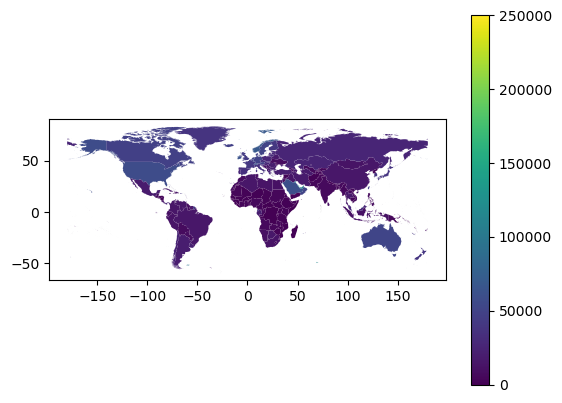

In [14]:
# fill in the question marks with the correct column
ax = gdf.plot(column = 'GDP_percapita', legend = True)

### Concatenating and Merging Data
<hr style="border-top: 0.2px solid gray; margin-top: 12px; margin-bottom: 1px"></hr>

Often you will have tabular data, like a `.csv` file, that does not contain Geographic information. But it may have catagorical staptial information. In this case you may have to [concatenate](https://pandas.pydata.org/docs/reference/api/pandas.concat.html) or [merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html), two datasets to join the `.csv` file to spatial boundaries contained in a `.shp` file. Both concatenate and merge are quite useful. But with tabular data, you will most likely need to join two (or more) datasets based on a common set of values. As such, `pd.merge()` is likely your friend.

For example, you may have a dataset with a columns called `country` but it does not have a geographic boundaries for the countries. You will then have to merge that dataset with a second dataset that has the geographic boundaries. This is often the case with `.csv` file that you want to attach to a `.shp` file to make a map.

To merge two datasets, both datasets must have a column with the same name and (hopefully) the same values on which to join the the datasets. Let's look at our `.csv` file from last week.

<div class="run">
    ▶️ <b> Run the cell below. </b>
</div>

In [16]:
fn = os.path.join('./data/DhsPrevalenceWCovar.csv')
df = pd.read_csv(fn)
df.head()

,country,year,countryCode,continent,stunt_rural,stunt_urban,waste_rural,waste_urban,stunt_all,waste_all,...,foodExport,foodImport,gdpPPP,gdpPPPpercap,giniIndex,urbanPop,urbanPopGrowth,clusterPrecipAnom,nationalTempAnom,nationalPrecipAnom
0,Albania,2008,ALB,Europe,0.240576,0.244390,0.092801,0.124743,0.242117,0.105710,...,4.333982,16.432549,2.921436e+10,9912.196804,30.0,49.991,1.435124,86.245678,102.151715,102.020721
1,Albania,2009,ALB,Europe,0.240576,0.244390,0.092801,0.124743,0.242117,0.105710,...,5.669017,17.087390,3.019429e+10,10313.952000,NaN,51.076,1.473288,132.170168,100.470106,134.103392
2,Armenia,2000,ARM,Asia,0.238902,0.178222,0.019989,0.034612,0.207806,0.027483,...,13.493826,24.967986,1.242650e+10,3921.857522,NaN,64.666,-1.610375,NaN,102.973351,74.551193
3,Armenia,2005,ARM,Asia,0.190440,0.214489,0.033354,0.081562,0.204712,0.061964,...,13.361364,17.662960,2.212058e+10,7259.203892,36.0,63.938,-0.761535,NaN,100.503031,114.152255
4,Armenia,2010,ARM,Asia,0.253302,0.197388,0.053731,0.036160,0.221035,0.043591,...,16.176402,17.667463,2.671931e+10,9068.787651,30.0,63.440,-0.766717,134.773428,114.066048,121.256156


**Cool!** Our dataset from last week has a column - `country` - that has catagorical geographic information that we can likely use to concatenate our geometry data from our world countries `.shp` file. But we first need to look at what columns we will need from world countries `.shp` file, which are the name and the geometry.

<div class="run">
    ▶️ <b> Run the cell below. </b>
</div>

In [17]:
gdf.columns

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'GEOUNIT',
       'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG',
       'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN',
       'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT',
       'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13',
       'POP_EST', 'POP_RANK', 'GDP_MD_EST', 'POP_YEAR', 'LASTCENSUS',
       'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'WIKIPEDIA', 'FIPS_10_', 'ISO_A2',
       'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID',
       'WOE_ID_EH', 'WOE_NOTE', 'ADM0_A3_IS', 'ADM0_A3_US', 'ADM0_A3_UN',
       'ADM0_A3_WB', 'CONTINENT', 'REGION_UN', 'SUBREGION', 'REGION_WB',
       'NAME_LEN', 'LONG_LEN', 'ABBREV_LEN', 'TINY', 'HOMEPART', 'MIN_ZOOM',
       'MIN_LABEL', 'MAX_LABEL', 'NE_ID', 'WIKIDATAID', 'NAME_AR', 'NAME_BN',
       'NAME_DE', 'NAME_

Let's make a new `GeoDataFrame` just with the columns we need and then let's merge.
<div class="run">
    ▶️ <b> Run the cell below. </b>
</div>

In [18]:
gdf_sub = gdf[['NAME','geometry']].copy()
gdf_sub.head()

,NAME,geometry
0,Indonesia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Bolivia,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Peru,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


Before we can merge the two datasets, we have to make sure they both have the same column name. In this case, we need to rename `NAME` to country. Take a moment to read about [pd.merge()].(https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html)
<div class="run">
    ▶️ <b> Run the cells below. </b>
</div>

In [19]:
# Rename the column
# inplace = True will overwrite the dataframe's columns name
gdf = gdf_sub.rename(columns = {'NAME' : 'country'}, inplace = True) 
gdf_sub.head()

,country,geometry
0,Indonesia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Bolivia,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Peru,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [20]:
# Now merge them
df_m = pd.merge(df, gdf_sub, on = 'country', how = 'inner')

In [21]:
# Check the columns of our DHS df_m
df_m.columns

Index(['country', 'year', 'countryCode', 'continent', 'stunt_rural',
       'stunt_urban', 'waste_rural', 'waste_urban', 'stunt_all', 'waste_all',
       'electricity', 'agLand', 'agLabor', 'foodExport', 'foodImport',
       'gdpPPP', 'gdpPPPpercap', 'giniIndex', 'urbanPop', 'urbanPopGrowth',
       'clusterPrecipAnom', 'nationalTempAnom', 'nationalPrecipAnom',
       'geometry'],
      dtype='object')

When you use `pd.merge()` it changes the type of the `GeoDataFrame` object back to a normal `Pandas DataFrame`. The geoemetry column still contains the `Shaple POLYGON` objects, but the it will not have the same attributes or methods as a `GeoPandas GeoData Frame`.

To fix this, we need to cast the `Pandas DataFrame` to a `GeoPandas GeoDataFrame`. GeoPandas sees the geometry column and knows it can implement a GeoDataFrame object. In other words, a normal DataFrame must have a `geometry` column with `Shapely` objects to be cast into a `GeoDateFrame`. In general, it is always best to only have the same type of `Shapely` geometry (POINT, LINE, POLYGONE, etc.) in a single `GeoDataFrame`.  


<div class="run">
    ▶️ <b> Run the cells below. </b>
</div>

In [22]:
print(type(df_m))
gdf_m = gpd.GeoDataFrame(df_m)
print(type(gdf_m))

<class 'pandas.core.frame.DataFrame'>
<class 'geopandas.geodataframe.GeoDataFrame'>


<Axes: >

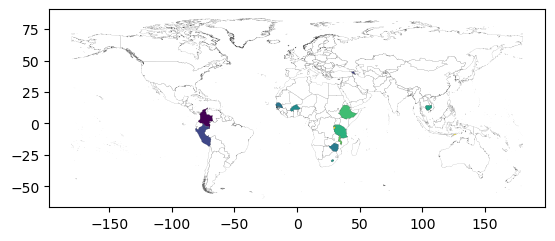

In [25]:
# May stunting rates for the surveys taken in 2015 with boundaries
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
gdf_sub.boundary. plot(ax = ax, color = 'black', linewidth = 0.05)
gdf_m[gdf_m['year'] == 2010].plot('stunt_all', ax = ax)

### Coordinate reference systems (CRS) and spatial Projections
<hr style="border-top: 0.2px solid gray; margin-top: 12px; margin-bottom: 1px"></hr>

The Earth is a three dimensional spheroid, but maps genearlly two dimensional representations of phenomena on the Earth. As such, cartographers have devevloped many methods to project 3-D data onto a 2-D surface. To map points, lines, and polygons from 3-D to 2-D, projections have a coordinate reference system (CRS) that provides information on the units and type of geographic transform performed on the data to map it. 

<img src="./assets/crs.jpg" alt="crs" width="500"/>

A full overview of geographic projections and coordinate reference systesms is out of scope for this course. But I suggest you [reading up on them](https://pro.arcgis.com/en/pro-app/3.1/help/mapping/properties/coordinate-systems-and-projections.htm) if you are unfamiliary with these terms. 

For this class, what you need to know is: 

1. Always check the `crs` of your data and to make sure that two or more datasets are in the same `crs` and `projection` before you perform analysis. This will be come clearer in future labs. 

2. Know that **reprojecting** data will fundmentally alter your data. This is okay. But it will add spatial uncertainty to analysis. More on this later.

Let's explore the .crs information and reproject the global country data. [EPSG](https://epsg.io) codes are useful to keep track of spatial meta data. Global data is often in [EPSG:4326](https://epsg.io/4326), the  World Geodetic System 1984.
<div class="run">
    ▶️ <b> Run the cells below. </b>
</div>

In [26]:
# Access the .crs attribute of a GeoDateFrame
print(type(gdf_sub.crs))
gdf_sub.crs

<class 'pyproj.crs.crs.CRS'>


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [27]:
# Notice that .crs has many methods and attributes

In [28]:
# Notice that .crs has many methods and attributes
dir(gdf_sub.crs)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_crs',
 '_local',
 'area_of_use',
 'axis_info',
 'coordinate_operation',
 'coordinate_system',
 'cs_to_cf',
 'datum',
 'ellipsoid',
 'equals',
 'from_authority',
 'from_cf',
 'from_dict',
 'from_epsg',
 'from_json',
 'from_json_dict',
 'from_proj4',
 'from_string',
 'from_user_input',
 'from_wkt',
 'geodetic_crs',
 'get_geod',
 'is_bound',
 'is_compound',
 'is_derived',
 'is_engineering',
 'is_exact_same',
 'is_geocentric',
 'is_geographic',
 'is_projected',
 'is_vertical',
 'list_authority',
 'name',
 'prime_meridian',
 'remarks',
 'scope',
 'source_crs',
 'srs',
 'sub_crs_list',
 'targ

<Axes: >

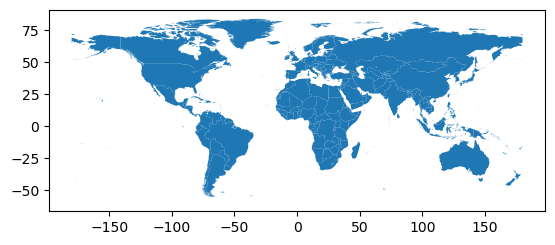

In [29]:
# Let's plot the data
gdf_sub.plot()

Now reproject it and plot it in a different crs, [ESRI:54009](https://epsg.io/54009), another commonly used global CRS. Note, this CRS was created by ESRI, not EPSG. 
<div class="run">
    ▶️ <b> Run the cells below. </b>
</div

<Axes: >

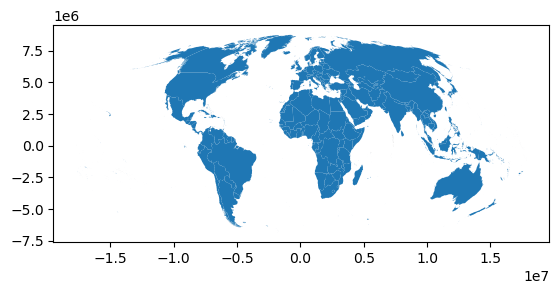

In [30]:
gdf_sub.to_crs('esri:54009').plot()

Notice that `esri:54009` distorts the edges of th earth and produces more an oval map. All projections distort one or more of the follow: area, direction, shape, and area. But some do a better job of preserving this information than others.

### Writing a shape file
It is very easy to write a `GeoDataFrame` to disk as a .shp file or a GeoJson file. Let's write our new DHS GeoDataFrame to disk.
<div class="run">
    ▶️ <b> Run the cells below. </b>
</div>

In [31]:
# first check the crs
gdf_m.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [32]:
# Create a File Name
fn = os.path.join('./data/new_dhs_data.shp')

## Introduction to GeoPandas

<img src="./assets/geopandas.png">

GeoPandas is an open-source Python library that ascribes geographic information to Pandas Series and Pandas DataFrame objects. In other words, GeoPandas enables a Pandas Series/DataFrame to have a spatial dimension, akin to a .shp file in a GIS platform. Importantly, Geopandas can perform geometric operations. To do this, GeoPandas objects use **[Shapely](https://pypi.org/project/shapely/)** geometry objects. 

### GeoSpatial Data 
<hr style="border-top: 0.2px solid gray; margin-top: 12px; margin-bottom: 1px"></hr>

GeoSpatial data is either `raster` (e.g. a grid) or `vector` (e.g. 2-d cartesian points, lines, or polygons). We will come back to raster data later in this lession. 

<img src="./assets/raster-vector.png" alt="rastervector" width="500"/>

Because GeoPandas ascribes spatial information to tabular data, GeoPandas objects are `vector` spatial data. Each row in a GeoPandas DataFrame, must have spatial information that is either a point, line, or polygon that corresponds to the geographic location(s), or area, to which the data should be mapped.  

To add spatial information to a Pandas DataFrame, the `geometry` column implements a `shapely` object that contains infromation about the cartesian location of the location of that data. Let's look at an example. 

In [33]:
# Write to disk. Notice we usually drop the index column and we also need to specify the crs. 
gdf_m.to_file(filename = fn, crs = gdf_m.crs)

/tmp/ipykernel_3774927/3618310189.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_m.to_file(filename = fn, crs = gdf_m.crs)


**QUESTION: What UserWarning did you just produce? Why might this UserWarning create problems for you later?**

In [34]:
# And open it to check it
gpd.read_file(fn).head()

,country,year,countryCod,continent,stunt_rura,stunt_urba,waste_rura,waste_urba,stunt_all,waste_all,...,foodImport,gdpPPP,gdpPPPperc,giniIndex,urbanPop,urbanPopGr,clusterPre,nationalTe,nationalPr,geometry
0,Albania,2008,ALB,Europe,0.240576,0.244390,0.092801,0.124743,0.242117,0.105710,...,16.432549,2.921436e+10,9912.196804,30.0,49.991,1.435124,86.245678,102.151715,102.020721,"POLYGON ((20.56715 41.87318, 20.54172 41.86158..."
1,Albania,2009,ALB,Europe,0.240576,0.244390,0.092801,0.124743,0.242117,0.105710,...,17.087390,3.019429e+10,10313.952000,NaN,51.076,1.473288,132.170168,100.470106,134.103392,"POLYGON ((20.56715 41.87318, 20.54172 41.86158..."
2,Armenia,2000,ARM,Asia,0.238902,0.178222,0.019989,0.034612,0.207806,0.027483,...,24.967986,1.242650e+10,3921.857522,NaN,64.666,-1.610375,NaN,102.973351,74.551193,"MULTIPOLYGON (((45.00240 41.29045, 45.03940 41..."
3,Armenia,2005,ARM,Asia,0.190440,0.214489,0.033354,0.081562,0.204712,0.061964,...,17.662960,2.212058e+10,7259.203892,36.0,63.938,-0.761535,NaN,100.503031,114.152255,"MULTIPOLYGON (((45.00240 41.29045, 45.03940 41..."
4,Armenia,2010,ARM,Asia,0.253302,0.197388,0.053731,0.036160,0.221035,0.043591,...,17.667463,2.671931e+10,9068.787651,30.0,63.440,-0.766717,134.773428,114.066048,121.256156,"MULTIPOLYGON (((45.00240 41.29045, 45.03940 41..."


<hr style="border-top: 0.2px solid gray; margin-top: 12pt; margin-bottom: 0pt"></hr>

## Introduction to Rasterio

<img src="./assets/rasterio.png">

[Rasterio](https://rasterio.readthedocs.io/en/stable/#) is an open-source Python library that enables the use and maniplation of raster data. Most often used for remote-sensed or weather/climate data, raster data is a spatial grid in which each cell is ascribe a numeric or float point value. Often, raster values actually mean something physical (e.g. a global map of daily maximum temperature may be in °C). But they also can be used to classify grid cells (e.g. a value of 0, means ocean and a value of 1 means land). 

<img src="./assets/raster-vector.png" alt="rastervector" width="500"/>

As shown above, `Vector` data can be transformed into `raster` data, and vice versa. Like vector data, `raster` data must have spatial metadata that explains the geographic extent, crs, and projection, as well as things like `nan` values 

### Loading a Raster

Let's take a look at a `raster` dataset. This file contains an estimated daily maximum air temperature values from [CHIRTS-daily](https://www.chc.ucsb.edu/data/chirtsdaily), a dataset I helped build during my PhD. CHIRTS-daily leverages the temporal accuracy of weather stations with the spatial coverage of weather satellites to produce a continuous ~5km grid of daily maximum temperatures from 1983-2016. This is really important, because much of the planet does not have weather station data. In fact, about 4 billion people live more than 25 km from a weather station (see our paper in [Environmental Research Letters](https://iopscience.iop.org/article/10.1088/1748-9326/ac30c0/pdf).

<div class="run">
    ▶️ <b> Run the cells below. </b>
</div>

In [35]:
import rasterio 

fn = os.path.join('./data/Tmax.2016.07.01.tif')
rst1 = rasterio.open(fn)
print(type(rst1))

<class 'rasterio.io.DatasetReader'>


The `rasterio` object is a `rasterio.io.DatasetReader` and has several attributes/methods that allow you to understand the dataset and access the data. But it is is not as straightforward as `GeoPandas DataFrames`. The `meta` attribute is the most useful. 

**QUESTION: What information does the meta give you?**

In [36]:
rst1.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': 7200,
 'height': 2600,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.05000000074505806, 0.0, -180.0,
        0.0, -0.05000000074505806, 70.0)}

Notice that the `meta` attribute is a Python `dictionary`, which means it can easily be accessed by `keys`. It can also be easily updated. 

In [37]:
print(rst1.meta['dtype'])

float32


### Read and Write the data
Raster files (usually `GeoTiff`) often contain multiple `bands` or stacked arrays. In this case our raster only has one band. We can access it with the code below. Notice that the `band` is a 2-d numpy object with a shape of 2600 rows by 7200 columns.

<div class="run">
    ▶️ <b> Run the cells below. </b>
</div>

In [38]:
rst1.read(1)

array([[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       ...,
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.]],
      dtype=float32)

In [39]:
print(type(rst1.read(1)))
print(rst1.read(1).shape)

<class 'numpy.ndarray'>
(2600, 7200)


Let's plot it!

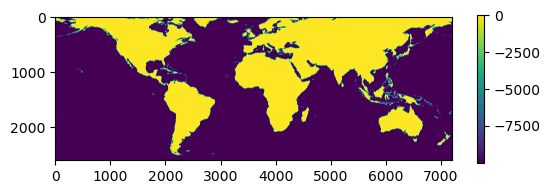

In [40]:
plt.imshow(rst1.read(1));
plt.colorbar(shrink = 0.4);

What's wrong with the image? Well it looks like the ocean values must be very small. Let's look at the meta data again and the array.

In [41]:
rst1.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': 7200,
 'height': 2600,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.05000000074505806, 0.0, -180.0,
        0.0, -0.05000000074505806, 70.0)}

In [42]:
rst1.read(1)

array([[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       ...,
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.]],
      dtype=float32)

The ocean values look like they are -9999, so let's update the `meta` data and write a new `GeoTiff` file so we know to ignore the ocean values.

In [43]:
# File Name
fn = os.path.join('./data/Tmax.2016.07.01_update.tif')

# Get the data array 
arr = rst1.read(1)

# Update the meta data
meta_out = rst1.meta
meta_out['nodata'] = -9999.
meta_out

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -9999.0,
 'width': 7200,
 'height': 2600,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.05000000074505806, 0.0, -180.0,
        0.0, -0.05000000074505806, 70.0)}

In [47]:
# Write the file
with rasterio.open(fn, "w", **meta_out) as dest:
    dest.write(arr, 1)

### Explore the new data 
Let's read the new data with the correct meta data values and plot it. Notice that the meta data is now correct, but the ocean is still funny. This is because `plt.imshow` is only being passed the `numpy array` object, not the meta data. So you will have to manual set the `vmin` and `vmax` parameteres.

In [48]:
rst1 = rasterio.open(fn)
rst1.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -9999.0,
 'width': 7200,
 'height': 2600,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.05000000074505806, 0.0, -180.0,
        0.0, -0.05000000074505806, 70.0)}

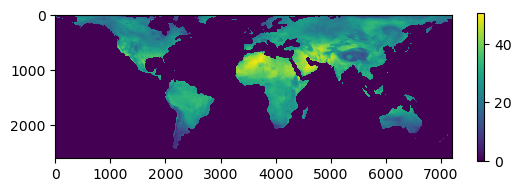

In [63]:
# -100 C seems like a solid low bound for air temperature data
plt.imshow(rst1.read(1), vmin = 0)
plt.colorbar(shrink = 0.4)

### We can also look at the distribution of the data
<div class="run">
    ▶️ <b> Run the cells below. </b>
</div>

In [50]:
# copy the array
arr = rst1.read(1)
print(arr.shape)

# flatten it
arr_f = arr.flatten()
print(arr_f.shape)

(2600, 7200)
(18720000,)


In [51]:
# Drop the ocean values
arr_f = arr_f[arr_f != -9999.]
print(arr_f.shape)

(5741925,)


Text(0.5, 1.0, 'Global Distribution of 2m Air Temperatures July 1 2016')

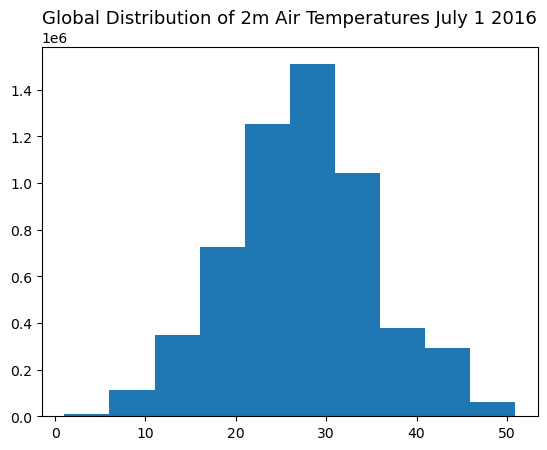

In [52]:
# Plot the histogram
plt.hist(arr_f);
plt.title('Global Distribution of 2m Air Temperatures July 1 2016', fontsize = 13)

### Raster Math
Because `raster` data are read by Python as 2-D `numpy arrays`, it is easy to preform mathmatical oppertations on them. The arrays must be the same size. In other words the rasters must align, the underlying raster files must have the same projection, .crs, spatial resolution, and spatial extent. 

We are going to use a climate projection I helped develop, the [CHC-CMIP6 dataset](https://www.chc.ucsb.edu/data/chc-cmip6). This is the highest resolution global climate projection for 2030 and 2050 produced to date. It is a very unique climate projection and if you have questions, I am happy to chat with you about it because it pretty different from other climate projections. Our hope in producing CHC-CMIP6, is literally to save lives by helping governments prepare for a much hotter future.

The datset we are using here uses the SSP-RCP 245 projection for 2050. [Carbon Brief](https://www.carbonbrief.org/explainer-how-shared-socioeconomic-pathways-explore-future-climate-change/) has a great data explainer to understand the basics of CMIP6 projection models. I suggest giving it a read.

<div class="run">
    ▶️ <b> Run the cells below. </b>
</div>

In [53]:
# File name
fn = os.path.join('./data/2050_SSP245.Tmax.2016.07.01.tif')

In [54]:
# Open
rst2 = rasterio.open(fn)

In [55]:
# Check meta data
rst2.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': 7200,
 'height': 2600,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.05000000074505806, 0.0, -180.0,
        0.0, -0.05000000074505806, 70.0)}

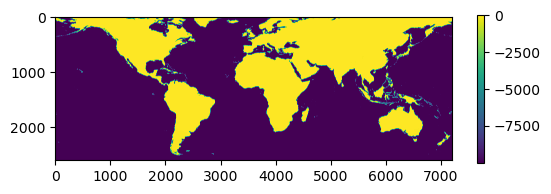

In [56]:
# Plot it
plt.imshow(rst2.read(1));
plt.colorbar(shrink = 0.4)

#### How much will the planet warm by 2050?

Keep in mind he ocean is still a problem with the `2050_SSP245` file, but we do not need to rewrite the file per say. As long as we know the issue, we can make sense of our data.

To figure out how much warming July 1, 2016 would be under an SSP245 projection in 2050, we simply subtract the two datasets.

**QUESTION: About how much hotter is July 1 in 2050 than 2016?**

<div class="run">
    ▶️ <b> Run the cells below. </b>
</div>

In [57]:
# Pull the arrays from the rasterio reader
arr_1 = rst1.read(1)
arr_2 = rst2.read(1)

# Do the math
arr_3 = arr_2 - arr_1

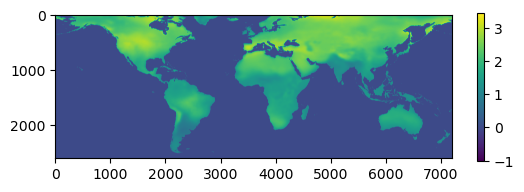

In [58]:
# Plot it, but let's mask out the ocean values but setting a low bound of -1 °C
plt.imshow(arr_3, vmin = -1);
plt.colorbar(shrink = 0.4);

In [59]:
# What is the maximum change in air temperatures?
arr_3[arr_3 != -9999].max()

3.4606762

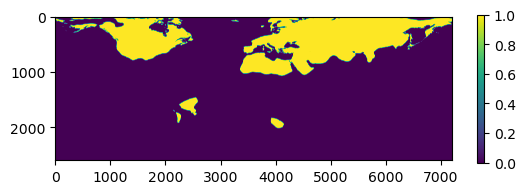

In [60]:
# Which areas of the planet will be > 2°C warmer on July 1?
data = np.where(arr_3 > 2, 1, 0)
plt.imshow(data)
plt.colorbar(shrink = 0.4);

### How much will the distribution of temperatures shift on July 1?

Text(0.5, 1.0, 'Global Distribution of 2m Air Temperatures July 1 2016 vs. July 1 2050 for SSP 245')

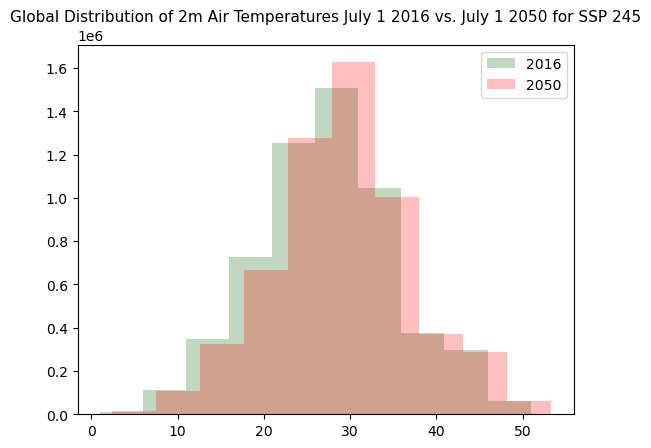

In [61]:
# Data for 2016
data = arr_1 = arr_1[arr_1 != -9999.]
plt.hist(arr_1, color = 'darkgreen', alpha = 0.25);

# Data for 2050
data = arr_2 = arr_2[arr_2 != -9999.]
plt.hist(arr_2, color = 'red', alpha = 0.25);

# Legend
plt.legend(labels = ['2016', '2050'])

plt.title('Global Distribution of 2m Air Temperatures July 1 2016 vs. July 1 2050 for SSP 245', fontsize = 11)

# Concluding Points

<img src="./assets/tay.jpg" alt="tay" width="500"/>

**Congratulations!** You now are on your way to truly doing Data Science for Sustainability. You know more about geospatial analysis than most humans on the planet. There is still tons left to learn and the best way to learn more is to practice. This notebook gives you a solid foundation to embark on your own work.